In [ ]:
import pandas as pd
import numpy as np
from tabata.opset import Opset
input_file = "../Data/cleaned/AFL1EB_cleaned_final.h5"
# Fichier de sortie nettoyé
cleanstore = "../Data/A.h5"
dsc = Opset(cleanstore)
dsc.clean()  # Nettoyage du fichier s'il existe déjà

for df in ds.iterator():
    if max(df["F[N]"]) > 0:  # Vérifie si les données sont valides
        x = df.index
        t = (x - x[0]).total_seconds()
        dt = np.diff(t)

        # Détection des anomalies temporelles
        i = np.argwhere(dt != dt[1])
        if len(i) > 0:
            name = df.index.name
            df.index = pd.date_range(x[0], periods=len(df), freq=x[1] - x[0])
            df.index.name = name  # Restaurer le nom

        # Détection des atterrissages incohérents (altitude qui remonte après descente)
        threshold = 50  # Altitude en mètres en dessous de laquelle on considère que l'avion a atterri
        landed = df["altitude"] < threshold
        remove_flight = False
        
        for j in range(1, len(df)):
            if landed.iloc[j - 1] and df["altitude"].iloc[j] > threshold:
                remove_flight = True
                break  # On arrête dès qu'on détecte une anomalie

        if not remove_flight:
            dsc.put(df)  # Sauvegarde uniquement les vols sans anomalie


In [11]:
import pandas as pd
A = pd.read_csv("dalt.csv")
dalt=A["0"]
dalt.values

array([ 1.94481389e-05,  1.93611888e-05,  1.91889723e-05,  1.89225134e-05,
        1.85589839e-05,  1.81041493e-05,  1.75524748e-05,  1.69022253e-05,
        1.61590638e-05,  1.53228850e-05,  1.44007578e-05,  1.34012477e-05,
        1.23376274e-05,  1.12279445e-05,  1.00976284e-05,  8.97725248e-06,
        7.89249637e-06,  6.86810522e-06,  5.94970242e-06,  5.16722396e-06,
        4.56284216e-06,  4.17244392e-06,  4.02117361e-06,  4.44591312e-06,
        5.39937206e-06,  6.81084075e-06,  8.75519748e-06,  1.15442615e-05,
        1.51210640e-05,  1.97452317e-05,  2.56794495e-05,  3.32406965e-05,
        4.30301798e-05,  5.54795345e-05,  7.13163566e-05,  9.13173444e-05,
        1.16502870e-04,  1.48288618e-04,  1.88237548e-04,  2.38277589e-04,
        3.00559840e-04,  3.77597496e-04,  4.72350712e-04,  5.87892953e-04,
        7.27800650e-04,  8.95552226e-04,  1.09511586e-03,  1.33045205e-03,
        1.60548602e-03,  1.92401950e-03,  2.28959976e-03,  2.70532398e-03,
        3.17376920e-03,  

In [12]:
import piecewise_regression
import numpy as np

alpha_1 = -4
alpha_2 = -2
constant = 100
breakpoint_1 = 7
n_points = 200
np.random.seed(0)
xx = np.linspace(0, 20, len(dalt))
yy = dalt.values


                    Breakpoint Regression Results                     
No. Observations                      574
No. Model Parameters                    4
Degrees of Freedom                    570
Res. Sum of Squares             0.0167344
Total Sum of Squares            0.0292133
R Squared                        0.427163
Adjusted R Squared               0.423136
Converged:                           True
                    Estimate      Std Err            t        P>|t|       [0.025       0.975]
----------------------------------------------------------------------------------------------------
const             0.00867635     0.000491        17.66      5.41e-56    0.0077114    0.0096414
alpha1          -0.000974051     5.03e-05      -19.347      1.74e-64   -0.0010729  -0.00087516
beta1              0.0044508     0.000642       6.9275             -    0.0031889    0.0057127
breakpoint1          16.9196         0.28            -             -        16.37       17.469
-----------------

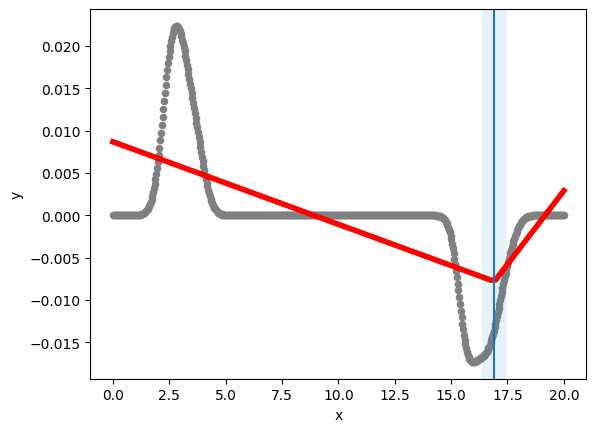

In [15]:
# Given some data, fit the model
pw_fit = piecewise_regression.Fit(xx, yy, start_values=[0], n_breakpoints=1)

# Print a summary of the fit
pw_fit.summary()
import matplotlib.pyplot as plt

# Plot the data, fit, breakpoints and confidence intervals
pw_fit.plot_data(color="grey", s=20)
# Pass in standard matplotlib keywords to control any of the plots
pw_fit.plot_fit(color="red", linewidth=4)
pw_fit.plot_breakpoints()
pw_fit.plot_breakpoint_confidence_intervals()
plt.xlabel("x")
plt.ylabel("y")
plt.show()
plt.close()